In [214]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

import warnings
warnings.filterwarnings('ignore')

In [215]:
%load_ext autoreload
%autoreload 2
%run '../../main.py'


from lib.helper import Functions
from lib.store.influxstore import InfluxStore

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [252]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2010, 2018)
dataSetOps.prepare10Min()

df = dataSetOps.df

# df = df.head(30000)

In [217]:
df['amp_n'] = Functions.calc_normal_dist(df['amp'], 1)
df['diff_n'] = Functions.calc_normal_dist(df['diff'], 1)

In [250]:
is_c1 = (df['amp'] * 10000 > 10) & (df['amp'] * 10000 < 20)

r_inc = (df['f_max'] - df['price']) * 10000 > 3
r_dec = (df['price'] - df['f_min']) * 10000 > 3
is_c1_v = (df['price'] - df['f_min'] - (2 / 10000)).apply(abs)

___________RESULT___________
confusion matrix: [[24717   674]
 [ 8376  3319]]
class_accuracy => accuracy:  0.6286258277529604 risk:  0.1687953919358878
class positive match: 0.08949468802243433
class positive match usage: 0.2837964942283027
________DAILY_METRICS_______
max daily risk 1.0
daily risk plot: AxesSubplot(0.125,0.2;0.775x0.68)
________VALUE_METRICS_______
wonValueSum 1.8884800000000002
lostValueSum 0.056620000000000795
resultValueSum 1.8318599999999994
resultValueP 0.9708909567631481


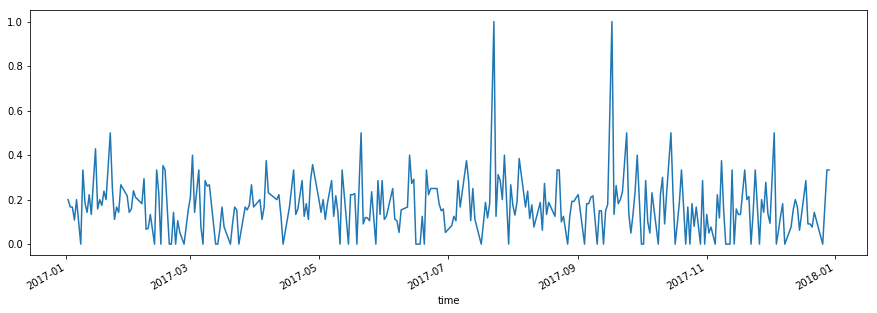

In [251]:
from lib.metric.simpleclassmetric import SimpleClassMetric

metric = SimpleClassMetric(df, is_c1, r_dec, is_c1_v)

metric.calculate()

metric.show()


In [223]:
df

,open,min,max,close,price,diff,amp,amp_n,f_min,f_max,time,diff_n
time,,,,,,,,,,,,
2018-01-01 17:20:00,1.20053,1.20042,1.20065,1.20065,1.20065,-0.00044,0.00002,0.001768,1.20063,1.20164,2018-01-01 17:20:00,-0.073579
2018-01-01 17:30:00,1.20064,1.20063,1.20164,1.20134,1.20134,0.00015,0.00033,0.029178,1.20131,1.20149,2018-01-01 17:30:00,0.027523
2018-01-01 17:40:00,1.20131,1.20131,1.20149,1.20134,1.20134,0.00069,0.00017,0.015031,1.20132,1.20151,2018-01-01 17:40:00,0.126606
2018-01-01 17:50:00,1.20132,1.20132,1.20151,1.20136,1.20136,0.00000,0.00131,0.115827,1.20020,1.20139,2018-01-01 17:50:00,0.000000
2018-01-01 18:00:00,1.20139,1.20020,1.20139,1.20091,1.20091,0.00002,0.00057,0.050398,1.20082,1.20158,2018-01-01 18:00:00,0.003670
2018-01-01 18:10:00,1.20091,1.20082,1.20158,1.20137,1.20137,-0.00045,0.00062,0.054819,1.20096,1.20138,2018-01-01 18:10:00,-0.075251
2018-01-01 18:20:00,1.20137,1.20096,1.20138,1.20133,1.20133,0.00046,0.00025,0.022104,1.20113,1.20150,2018-01-01 18:20:00,0.084404
2018-01-01 18:30:00,1.20137,1.20113,1.20150,1.20117,1.20117,-0.00004,0.00057,0.050398,1.20093,1.20120,2018-01-01 18:30:00,-0.006689
2018-01-01 18:40:00,1.20120,1.20093,1.20120,1.20105,1.20105,-0.00016,0.00023,0.020336,1.20097,1.20113,2018-01-01 18:40:00,-0.026756


In [220]:
# from highcharts import Highstock

# # A chart is the container that your data will be rendered in, it can (obviously) support multiple data series within it.
# chart = Highstock()

# chart

# # Adding a series requires at minimum an array of data points. 
# # You can also change the series type, the name, or other series options as kwargs.

# dfv = df.head(3000)

# historical = []
# amp = []
# diff = []
# class_2 = []

# chart.set_options('yAxis', [{
#       "labels": {
#         "align": 'right',
#       },
#       "title": {
#         "text": 'Prices'
#       }
#     }, {
#       "labels": {
#         "align": 'right',
#       },
#       "title": {
#         "text": 'Prices'
#       }
#     }])

# for i in range(0, len(dfv)):
#     historical.append([dfv.iloc[i]['time'], dfv.iloc[i]['price']])
#     amp.append([dfv.iloc[i]['time'], dfv.iloc[i]['amp_n']])
#     diff.append([dfv.iloc[i]['time'], dfv.iloc[i]['diff_n']])
#     class_2.append([dfv.iloc[i]['time'], int(dfv.iloc[i]['class_1'])])    

# chart.add_data_set(historical, series_type='line', name='EUR USD historical', yAxis=1)
# chart.add_data_set(class_2, series_type='line', name='class1', yAxis=0)
# # chart.add_data_set(diff, series_type='line', name='Diff', yAxis=0)

# # chart
